In [1]:
import numpy as np

In [2]:
from expert_prediction.online_experts import *
from ensemble_algorithms import *
from ensemble import *
import matplotlib.pyplot as plt

np.random.seed(0)

# Setting Up the Forecasters

# Building Forecasters

In [3]:
def create_expert(std,actual_values):
    return actual_values+np.random.randn(actual_values.size)*std

def can_experts(actual_values,stds):
    expert_predictions = np.array([create_expert(std,actual_values) for std in stds])
    experts = [CannedExpert(expert_predictions[i]) for i in range(len(stds))]
    return experts,expert_predictions

In [4]:
actual_values_1 = np.load("default_actual_values_1.npy")

In [5]:
expert_predictions_1 = np.load("default_expert_predictions_1.npy")

In [6]:
expert_predictions_1.shape

(10, 256, 1)

In [7]:
experts = [CannedExpert(expert_predictions_1[i,:,0]) for i in range(10)]

In [8]:
X = np.random.randn(20,20,1)

In [9]:
X_test = np.random.randn(80,20,1)

In [10]:
experts[0]._predict(X)

array([0.5927322 , 0.5923442 , 0.5927242 , 0.5933733 , 0.5932357 ,
       0.59329695, 0.5872136 , 0.57998013, 0.57634664, 0.5751074 ,
       0.5729318 , 0.56697345, 0.5611589 , 0.559504  , 0.56033355,
       0.5624102 , 0.5664424 , 0.5704743 , 0.5733782 , 0.5785042 ],
      dtype=float32)

In [11]:
actual_values = actual_values_1[:80] 

In [12]:
expert_predictions = expert_predictions_1[:,:80,0]

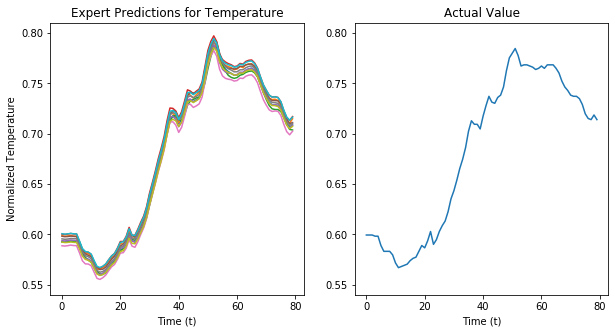

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))

# Loss
ax1.plot(expert_predictions.T)
ax1.set_xlabel("Time (t)")
ax1.set_title("Expert Predictions for Temperature")
ax1.set_ylim(0.54,0.81)
ax1.set_ylabel("Normalized Temperature")

# Regret
ax2.plot(actual_values)
ax2.set_xlabel("Time (t)")
ax2.set_title("Actual Value")
ax2.set_ylim(0.54,0.81)

plt.subplots_adjust(wspace=0.2)

# Building Ensemble Forecaster

## NNLS

In [14]:
ensemble_forecaster_nnls = EnsembleForecaster(experts,NNLSEnsemble(10,loss_func=se))

In [15]:
ensemble_forecaster_nnls._fit_ensemble(X, actual_values[:20])

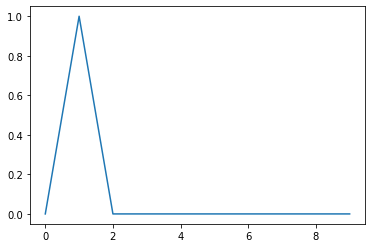

In [16]:
plt.plot(ensemble_forecaster_nnls.ensemble_algorithm.weights)

In [17]:
online_predictions_nnls = ensemble_forecaster_nnls._online_predict(X_test,actual_values)

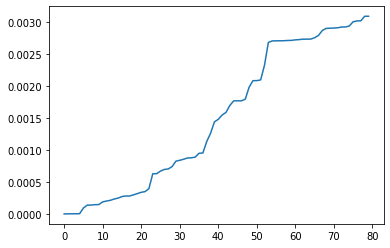

In [19]:
plt.plot(np.cumsum(calculate_losses(actual_values,online_predictions_nnls,loss_func = se)))

In [20]:
regret(online_predictions_nnls,expert_predictions,actual_values,loss_func=se)

6.492345190247262e-05

## Hedge Doubling

In [21]:
hedge_algorithm_d = HedgeExpertEnsemble(10,50,OnlineHedgeDoubling(),loss_func=se)

In [22]:
ensemble_forecaster_hedge_d = EnsembleForecaster(experts,hedge_algorithm_d)

In [23]:
ensemble_forecaster_hedge_d._fit_ensemble(X,actual_values[:20])

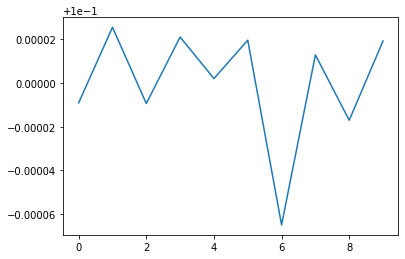

In [24]:
plt.plot(ensemble_forecaster_hedge_d.ensemble_algorithm.online_expert.weights)

In [25]:
online_predictions_hedge_d = ensemble_forecaster_hedge_d._online_predict(X_test,actual_values)

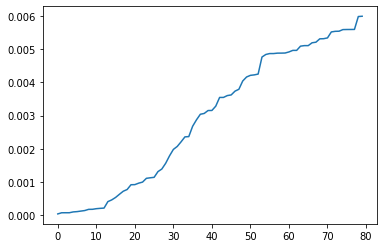

In [26]:
plt.plot(np.cumsum(calculate_losses(actual_values,online_predictions_hedge_d,loss_func = se)))

In [27]:
regret(online_predictions_hedge_d,expert_predictions,actual_values,loss_func=se)

0.002972153150147663

## Hedge Incremental

In [28]:
hedge_algorithm_i = HedgeExpertEnsemble(10,50,OnlineHedgeIncremental(),loss_func=se)

In [29]:
ensemble_forecaster_hedge_i = EnsembleForecaster(experts,hedge_algorithm_i)

In [30]:
ensemble_forecaster_hedge_i._fit_ensemble(X,actual_values[:20])

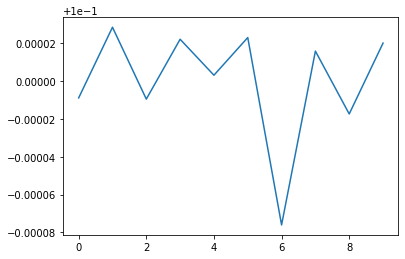

In [31]:
plt.plot(ensemble_forecaster_hedge_i.ensemble_algorithm.online_expert.weights)

In [32]:
online_predictions_hedge_i = ensemble_forecaster_hedge_i._online_predict(X_test,actual_values)

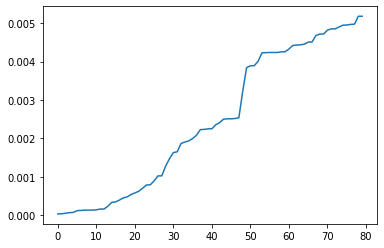

In [33]:
plt.plot(np.cumsum(calculate_losses(actual_values,online_predictions_hedge_i,loss_func = se)))

In [34]:
regret(online_predictions_hedge_i,expert_predictions,actual_values,loss_func=se)

0.0021563022612782266

## Hedge Normal

In [35]:
hedge_algorithm_n = HedgeExpertEnsemble(10,50,NormalHedge(),loss_func=se)

In [36]:
ensemble_forecaster_hedge_n = EnsembleForecaster(experts,hedge_algorithm_n)

In [37]:
ensemble_forecaster_hedge_n._fit_ensemble(X,actual_values[:20])

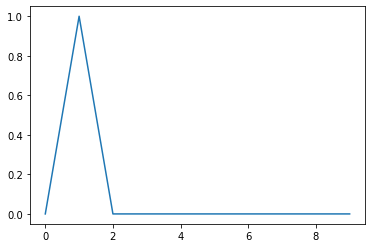

In [38]:
plt.plot(ensemble_forecaster_hedge_n.ensemble_algorithm.online_expert.weights)

In [39]:
online_predictions_hedge_n = ensemble_forecaster_hedge_n._online_predict(X_test,actual_values)

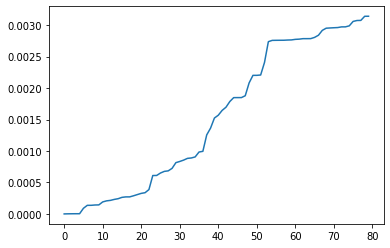

In [40]:
plt.plot(np.cumsum(calculate_losses(actual_values,online_predictions_hedge_n,loss_func = se)))

In [41]:
regret(online_predictions_hedge_n,expert_predictions,actual_values,loss_func=se)

0.0001155749678203419

## Discrepancy Based-Forecaster

In [42]:
hedge_algorithm_disc = DiscrepancyEnsemble(10,OnlineHedgeIncremental(n=10,loss_func=se),loss_func=se)

In [43]:
ensemble_forecaster_hedge_disc = EnsembleForecaster(experts,hedge_algorithm_disc)

In [44]:
ensemble_forecaster_hedge_disc._fit_ensemble(X,actual_values[:20])

KeyboardInterrupt: 

In [ ]:
plt.plot(ensemble_forecaster_hedge_disc.ensemble_algorithm.online_expert.weights)

In [ ]:
online_predictions_hedge_disc = ensemble_forecaster_hedge_disc._predict(X_test)

In [ ]:
plt.plot(np.cumsum(calculate_losses(actual_values,online_predictions_hedge_disc,loss_func = se)))

In [ ]:
regret(online_predictions_hedge_disc,expert_predictions,actual_values,loss_func=se)

In [ ]:
hedge_algorithm_disc_1 = DiscrepancyEnsemble(10,OnlineHedgeDoubling(n=10,loss_func=se),loss_func=se)

In [ ]:
ensemble_forecaster_hedge_disc_1 = EnsembleForecaster(experts,hedge_algorithm_disc_1)

In [ ]:
ensemble_forecaster_hedge_disc_1._fit_ensemble(X,actual_values[:20])

In [ ]:
online_predictions_hedge_disc_1 = ensemble_forecaster_hedge_disc_1._online_predict(X_test,actual_values)

## Averaging

# Comparison Plots

## Cumulative Losses

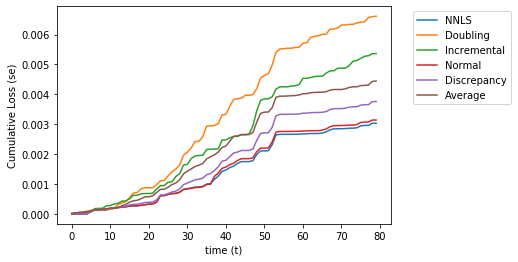

In [116]:
plt.plot(np.cumsum(calculate_losses(actual_values,online_predictions_nnls,loss_func = se)),label="NNLS",color="C0") # NNLS
plt.plot(np.cumsum(calculate_losses(actual_values,online_predictions_hedge_d,loss_func = se)),label="Doubling",color="C1") # Doubling
plt.plot(np.cumsum(calculate_losses(actual_values,online_predictions_hedge_i,loss_func = se)),label="Incremental",color="C2") # Incremental
plt.plot(np.cumsum(calculate_losses(actual_values,online_predictions_hedge_n,loss_func = se)),label="Normal",color="C3") # Normal
plt.plot(np.cumsum(calculate_losses(actual_values,online_predictions_hedge_disc_1,loss_func = se)),label="Discrepancy",color="C4") # Discrepancy
plt.plot(np.cumsum(calculate_losses(actual_values,expert_predictions.mean(axis=0),loss_func = se)),label="Average",color="C5") # Average
plt.xlabel("time (t)")
plt.ylabel("Cumulative Loss (se)")


plt.legend(bbox_to_anchor=(1.05, 1))

## Cumulative Regret

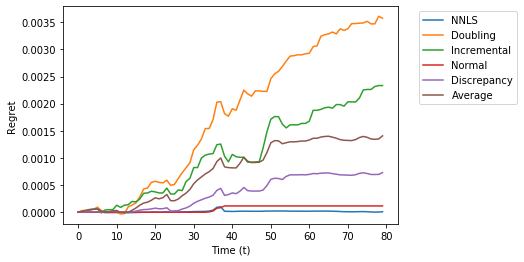

In [121]:
plt.plot([regret(online_predictions_nnls[:i],expert_predictions[:,:i],actual_values[:i],loss_func = se) for i in range(len(actual_values))],label="NNLS",color="C0") # NNLS
plt.plot([regret(online_predictions_hedge_d[:i],expert_predictions[:,:i],actual_values[:i],loss_func = se) for i in range(len(actual_values))],label="Doubling",color="C1") # Doubling
plt.plot([regret(online_predictions_hedge_i[:i],expert_predictions[:,:i],actual_values[:i],loss_func = se) for i in range(len(actual_values))],label="Incremental",color="C2") # Incremental
plt.plot([regret(online_predictions_hedge_n[:i],expert_predictions[:,:i],actual_values[:i],loss_func = se) for i in range(len(actual_values))],label="Normal",color="C3") # Normal
plt.plot([regret(online_predictions_hedge_disc_1[:i],expert_predictions[:,:i],actual_values[:i],loss_func = se) for i in range(len(actual_values))],label="Discrepancy",color="C4") # Normal
plt.plot([regret(expert_predictions.mean(axis=0)[:i],expert_predictions[:,:i],actual_values[:i],loss_func = se) for i in range(len(actual_values))],label="Average",color="C5") # Average

plt.xlabel("Time (t)")
plt.ylabel("Regret")

plt.legend(bbox_to_anchor=(1.05, 1))

## Side by Side Plot

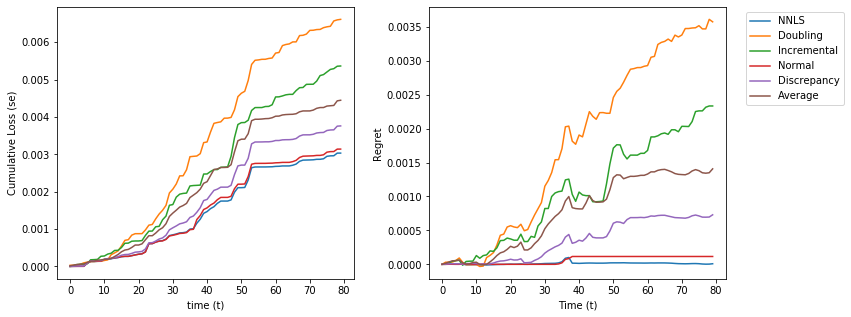

In [137]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,5))
# fig.suptitle('Performance over LSTM Task')

# Loss

ax1.plot(np.cumsum(calculate_losses(actual_values,online_predictions_nnls,loss_func = se)),label="NNLS",color="C0") # NNLS
ax1.plot(np.cumsum(calculate_losses(actual_values,online_predictions_hedge_d,loss_func = se)),label="Doubling",color="C1") # Doubling
ax1.plot(np.cumsum(calculate_losses(actual_values,online_predictions_hedge_i,loss_func = se)),label="Incremental",color="C2") # Incremental
ax1.plot(np.cumsum(calculate_losses(actual_values,online_predictions_hedge_n,loss_func = se)),label="Normal",color="C3") # Normal
ax1.plot(np.cumsum(calculate_losses(actual_values,online_predictions_hedge_disc_1,loss_func = se)),label="Discrepancy",color="C4") # Discrepancy
ax1.plot(np.cumsum(calculate_losses(actual_values,expert_predictions.mean(axis=0),loss_func = se)),label="Average",color="C5") # Average
ax1.set_xlabel("Time (t)")
ax1.set_ylabel("Cumulative Loss (se)")

# Regret
ax2.plot([regret(online_predictions_nnls[:i],expert_predictions[:,:i],actual_values[:i],loss_func = se) for i in range(len(actual_values))],label="NNLS",color="C0") # NNLS
ax2.plot([regret(online_predictions_hedge_d[:i],expert_predictions[:,:i],actual_values[:i],loss_func = se) for i in range(len(actual_values))],label="Doubling",color="C1") # Doubling
ax2.plot([regret(online_predictions_hedge_i[:i],expert_predictions[:,:i],actual_values[:i],loss_func = se) for i in range(len(actual_values))],label="Incremental",color="C2") # Incremental
ax2.plot([regret(online_predictions_hedge_n[:i],expert_predictions[:,:i],actual_values[:i],loss_func = se) for i in range(len(actual_values))],label="Normal",color="C3") # Normal
ax2.plot([regret(online_predictions_hedge_disc_1[:i],expert_predictions[:,:i],actual_values[:i],loss_func = se) for i in range(len(actual_values))],label="Discrepancy",color="C4") # Normal
ax2.plot([regret(expert_predictions.mean(axis=0)[:i],expert_predictions[:,:i],actual_values[:i],loss_func = se) for i in range(len(actual_values))],label="Average",color="C5") # Average

ax2.set_xlabel("Time (t)")
ax2.set_ylabel("Regret")

ax2.legend(bbox_to_anchor=(1.05, 1))

plt.subplots_adjust(wspace=0.25)

## Weight Convergence